<div style='background: #e1ff00'> <h1>Student Information</h1>

Name:Miss Pattamon Rattanapan

Student ID:108065436

GitHub ID: https://github.com/mon826

## Begin Assignment Here
### Lab Homework (Dataset)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import nltk
import os
import math
import string
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#  1. The data preparation

Firstly we use Pandas to import the file in to Python  
Then assign the colum name on the top of each column  
and print the head and tail of the data to see

### 1.1 Initial check the information

In [2]:
#Firstly, we import the file into Python
#Then assign the column name on the top of each files

#Import the file "Amazon"
col_Names=["Sentence", "Score"]
Amazon = pd.read_csv (r'C:\Users\User\Data Mining_NTHU\DMLab1x\Dataset_Original\Dataset for HW lab\amazon_cells_labelled.txt', 
                    sep='\t', header=None, names=col_Names)
print("Amazon Head")
print (Amazon.head())
print(" \n")
print(" Amazon Tail")
print (Amazon.tail())
print(" \n\n\n\n")



#Import the file "Yelp"
col_Names=["Sentence", "Score"]
Yelp = pd.read_csv (r'C:\Users\User\Data Mining_NTHU\DMLab1x\Dataset_Original\Dataset for HW lab\yelp_labelled.txt', 
                    sep='\t', header=None, names=col_Names)
print("Yelp Head")
print (Yelp.head())
print(" \n")
print(" Yelp Tail")
print (Yelp.tail())
print(" \n\n\n\n")



#Import the file "Imdb"
col_Names=["Sentence", "Score"]
Imdb = pd.read_csv (r'C:\Users\User\Data Mining_NTHU\DMLab1x\Dataset_Original\Dataset for HW lab\imdb_labelled.txt', 
                    sep='\t', header=None, names=col_Names)
print("Imdb Head")
print (Imdb.head())
print(" \n")
print(" Imdb Tail")
print (Imdb.tail())

Amazon Head
                                            Sentence  Score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
 

 Amazon Tail
                                              Sentence  Score
995  The screen does get smudged easily because it ...      0
996  What a piece of junk.. I lose more calls on th...      0
997                       Item Does Not Match Picture.      0
998  The only thing that disappoint me is the infra...      0
999  You can not answer calls with the unit, never ...      0
 




Yelp Head
                                            Sentence  Score
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was jus

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
#Then we try another method to check the data by using sample to check
#Syntax : df.info()
print (Amazon.sample())
print("\n")
print (Yelp.sample())
print("\n")
print (Imdb.sample())

                                             Sentence  Score
20  I went on Motorola's website and followed all ...      0


              Sentence  Score
11  Would not go back.      0


                Sentence  Score
313  The cast is good.        1


In [5]:
#Check the basic information
Amazon.info()
print("\n")
Yelp.info()
print("\n")
Imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Sentence    1000 non-null object
Score       1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Sentence    1000 non-null object
Score       1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
Sentence    748 non-null object
Score       748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


## 1.1 Combine file for ease of management
We combine all 3 files together to make it easier to work on the data

In [6]:
#Adding new column to defind the source of each data
Amazon.insert(2, "Source", "amazon.com")
Amazon.head()

,Sentence,Score,Source
0,So there is no way for me to plug it in here i...,0,amazon.com
1,"Good case, Excellent value.",1,amazon.com
2,Great for the jawbone.,1,amazon.com
3,Tied to charger for conversations lasting more...,0,amazon.com
4,The mic is great.,1,amazon.com


In [7]:
Yelp.insert(2, "Source", "yelp.com")
Yelp.head()

,Sentence,Score,Source
0,Wow... Loved this place.,1,yelp.com
1,Crust is not good.,0,yelp.com
2,Not tasty and the texture was just nasty.,0,yelp.com
3,Stopped by during the late May bank holiday of...,1,yelp.com
4,The selection on the menu was great and so wer...,1,yelp.com


In [8]:
Imdb.insert(2, "Source", "imdb.com")
Imdb.head()

,Sentence,Score,Source
0,"A very, very, very slow-moving, aimless movie ...",0,imdb.com
1,Not sure who was more lost - the flat characte...,0,imdb.com
2,Attempting artiness with black & white and cle...,0,imdb.com
3,Very little music or anything to speak of.,0,imdb.com
4,The best scene in the movie was when Gerardo i...,1,imdb.com


In [9]:
#Combine the 3 dataframe into 1 file and print the head to see

#Combine 3 files vertically
total1 = pd.concat([Amazon,Yelp,Imdb], axis=0, ignore_index=True)

#Combine 3 files horizontally
total2 = pd.concat([Amazon,Yelp,Imdb], axis=1, ignore_index=True)
total1.head()

,Sentence,Score,Source
0,So there is no way for me to plug it in here i...,0,amazon.com
1,"Good case, Excellent value.",1,amazon.com
2,Great for the jawbone.,1,amazon.com
3,Tied to charger for conversations lasting more...,0,amazon.com
4,The mic is great.,1,amazon.com


In [10]:
#Then check the tail
total1.tail()

,Sentence,Score,Source
2743,I just got bored watching Jessice Lange take h...,0,imdb.com
2744,"Unfortunately, any virtue in this film's produ...",0,imdb.com
2745,"In a word, it is embarrassing.",0,imdb.com
2746,Exceptionally bad!,0,imdb.com
2747,All in all its an insult to one's intelligence...,0,imdb.com


In [11]:
#And then randomly check
total1.sample()

,Sentence,Score,Source
2568,And it was boring.,0,imdb.com


In [12]:
#We check the basic information of the data after combining
total1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
Sentence    2748 non-null object
Score       2748 non-null int64
Source      2748 non-null object
dtypes: int64(1), object(2)
memory usage: 64.5+ KB


In [13]:
len(total1)

2748

# 2. Data mining Using Pandas
## 2.1 Data missing value checking

In [14]:
#Checking the missing value by using the syntax: df.isnull()
#The returning value of 'False' >> means no missing value
total1.isnull()


,Sentence,Score,Source
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [15]:
#Checking data missing at first >> there is no missing data
total1.isnull().apply(lambda x: dmh.check_missing_values(total1))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 0)
dtype: object

In [16]:
total1.isnull().apply(lambda x: dmh.check_missing_values(total1), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

In [17]:
#Checking data missing at first >> there is no missing data
total1.isnull().apply(lambda x: dmh.check_missing_values(total1))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 0)
dtype: object

In [18]:
len(total1)

2748

In [19]:
#Define dummy series and print it to see
dummy_series1 = pd.Series(["dummy record",1], index=["Sentence","Source"])
dummy_series1

Sentence    dummy record
Source                 1
dtype: object

In [20]:
#Then we add the new row of data which contains missing value
result_with_series = total1.append(dummy_series1, ignore_index=True)

In [21]:
total1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
Sentence    2748 non-null object
Score       2748 non-null int64
Source      2748 non-null object
dtypes: int64(1), object(2)
memory usage: 64.5+ KB


In [22]:
#And then print its length to see if the missing value of data has been added or not
#The length of data become 2749 from original of 2748 before adding the missing value
len(result_with_series)

2749

In [23]:
#Re-check by using the same code to see if it detect the missing value
#by using the function check, it  shows  the missing value 
#result_with_series.reindex()
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 1)
Source      (The amoung of missing records is: , 0)
dtype: object

In [24]:
#Then use the function to drop the row with missing value 
result_with_series.dropna(inplace=True)

In [25]:
#And recheck again by using the same function to see if the missing value is drop out or not.
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 0)
dtype: object

In [26]:
#The amount of len change from 2749 >> 2748>> indicating that the missing value has been droped
len(result_with_series)

2748

## 2.2 Data Duplication checking
To verify that there is no duplication in the dataset

In [27]:
#Checking on the data duplication
total1.duplicated()

#Then print the number of duplication row
len(total1[ total1.duplicated(['Sentence'], keep = False)])

34

In [28]:
#Then the amount of duplication = # of duplication/2 = 17 
sum(total1.duplicated())

17

In [29]:
#Then we print all of the duplicated data to see
print(total1[ total1.duplicated(['Sentence'], keep = False)])

                                               Sentence  Score      Source
18                                        Works great!.      1  amazon.com
179   If you like a loud buzzing to override all you...      0  amazon.com
180                             Don't buy this product.      0  amazon.com
187                                       Great phone!.      1  amazon.com
262                                        Works great.      1  amazon.com
285                                       Great phone!.      1  amazon.com
290                                        Great Phone.      1  amazon.com
392                               This is a great deal.      1  amazon.com
402                    Excellent product for the price.      1  amazon.com
407                                        Works great.      1  amazon.com
446                                       Does not fit.      0  amazon.com
524                                       Works great!.      1  amazon.com
543                      

In [30]:
#We only drop the duplicate row of the dataset
#Syntax to drop only duplicate data: df.drop_duplicates
#Syntax to drop all duplicated data (including its original): df.drop_duplicates(keep=False, inplace=True)

#All duplication rows = 34
#droped rows = 17
#Then the remaining rows = 2731

total1.drop_duplicates(inplace=True)
len(total1)

2731

# 3. Data Preprocessing
The data preprocessing in this notebook will cover the following topics shown below;
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

## 3.1 Sampling

In [31]:
#random state
total1_sample = total1.sample(n=100)
len(total1_sample)

100

In [32]:
#Print sample of data to see
total1_sample[0:5]

,Sentence,Score,Source
2676,Paolo Sorrentino has written a wonderful story...,1,imdb.com
431,It finds my cell phone right away when I enter...,1,amazon.com
1280,I went to Bachi Burger on a friend's recommend...,1,yelp.com
1633,High-quality chicken on the chicken Caesar salad.,1,yelp.com
2179,I really loved the story line and the poler be...,1,imdb.com


## 3.2 Feature Creation
* Feature creation is to create new interesting and useful features from the original dataset  
* Creating features from text file
* Also b able to call *'feature enginerring'*

  
  
**Feature Creation Processing**
* obtain *cumigram* for each text (referring to 'Tokens'/ 'Individual words')
* Obtains statistics from *word frequency/ word distribution*

In [35]:
import nltk

In [36]:
#Processing  >> Using 'UNIGRAMS' as a tool to divide the 'text' into seperated words
total1['unigrams'] = total1['Sentence'].apply(lambda x: dmh.tokenize_text(x))

#Print the unigram version to see how the data change
total1[0:5]["unigrams"]

In [37]:
#Then print the original version to compare
total1[0:5]

,Sentence,Score,Source,unigrams
0,So there is no way for me to plug it in here i...,0,amazon.com,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon.com,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon.com,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon.com,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon.com,"[The, mic, is, great, .]"


In [38]:
#Print one line in list to see how the words are divided
list(total1[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

## 3.3  Feature subset selection
Working on subset selection and the sample shown below;
![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)  

Transforming the articles into **a term-document matrix** -- using analyzer (or sometimes called defalt tokenizer)  
It will produce *words frequency vector*  
***CountVectorizer*** is the default analyzer 

In [39]:
#Count words and create Bag of Words
#from sklearn.feature_extraction.text >> we import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
total1_counts = count_vect.fit_transform(total1.Sentence)  

In [40]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(total1[:2].Sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter',
 'good',
 'case',
 'excellent',
 'value']

In [41]:
#Checking the shape of the matrix we just made
#2731 >> # of row
total1_counts.shape

(2731, 5155)

In [42]:
#Then obtain the feature names of the vectorizer --usually on the horizontal axis
count_vect.get_feature_names()[:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [43]:
total1[0:5]

,Sentence,Score,Source,unigrams
0,So there is no way for me to plug it in here i...,0,amazon.com,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon.com,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon.com,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon.com,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon.com,"[The, mic, is, great, .]"


In [44]:
# we convert from sparse array to normal array
total1_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

#### Use the vectorizer to generate word frequency vector

In [45]:
#Try 00
count_vect.transform(['00']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
#Try 01 to see the different
count_vect.transform(['01']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [48]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

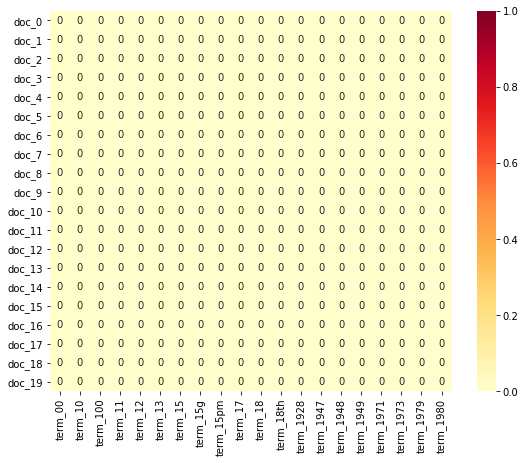

In [88]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(total1.index)[:20]]
plot_z = total1_counts[:20, :20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="YlOrRd",
                 vmin=0, vmax=1, annot=True)

### 3.4 Dimensionality Reduction

In [52]:
from sklearn.decomposition import PCA

In [53]:
X_reduced = PCA(n_components = 2).fit_transform(total1_counts.toarray())

In [60]:
X_reduced.shape

(2731, 2)

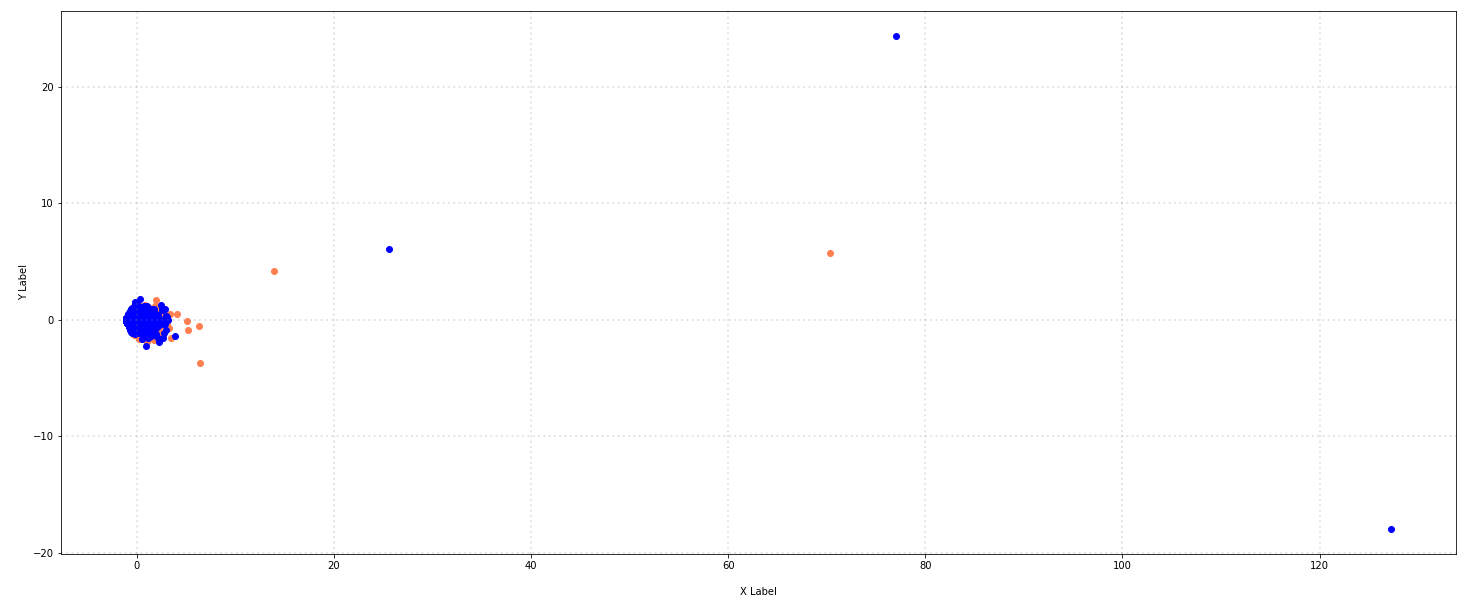

In [267]:
col = ['coral', 'blue', 'black', 'm']
Score = [1,0]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, Score):
    
    xs = X_reduced[total1['Score'] == category].T[0]
    ys = X_reduced[total1['Score'] == category].T[1]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


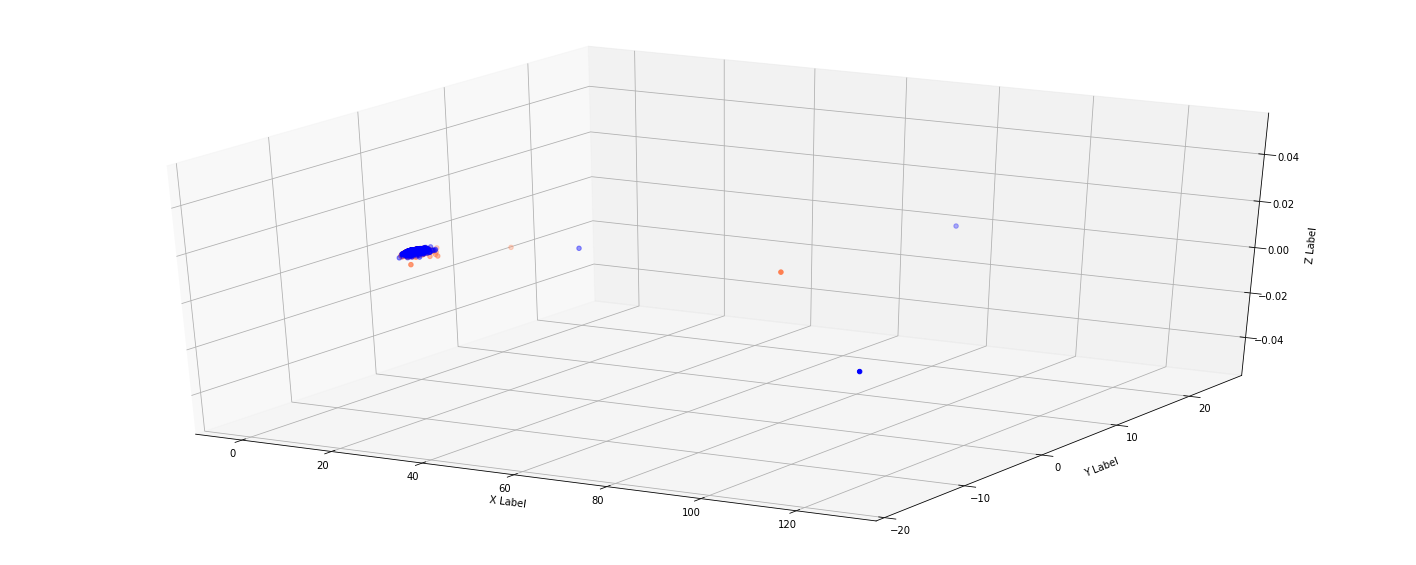

In [270]:
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'm']
Score = [1,0]

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, Score):
    
    xs = X_reduced[total1['Score'] == category].T[0]
    ys = X_reduced[total1['Score'] == category].T[1]
    zs = X_reduced[total1['Score'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### 3.5 Atrribute Transformation / Aggregation

In [62]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,total1_counts.shape[1]):
    term_frequencies.append(sum(total1_counts[:,j].toarray()))

In [63]:
term_frequencies = np.asarray(total1_counts.sum(axis=0))[0]

In [64]:
term_frequencies[0]

1

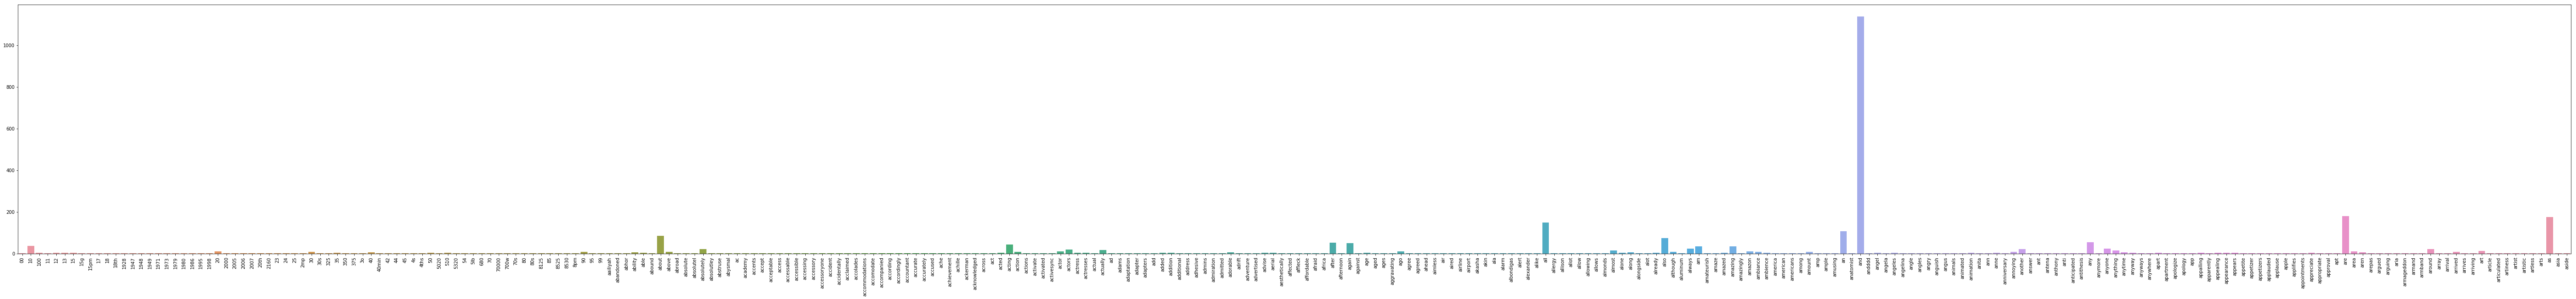

In [65]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [66]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

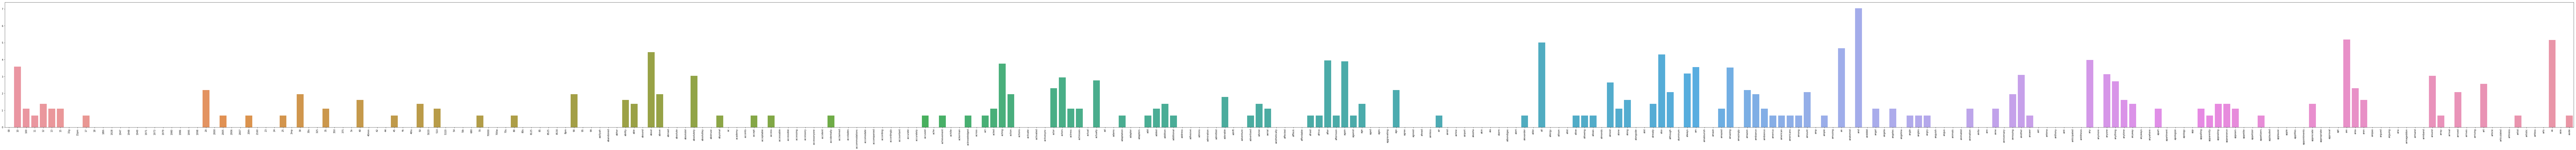

In [67]:
plt.subplots(figsize=(200, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 3.6 Discretization and Binarization

In [68]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [69]:
mlb = preprocessing.LabelBinarizer()

In [70]:
mlb.fit(total1.Sentence)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [71]:
mlb.classes_

array([' I love it.  \t1\nThe ending is so, SO perfect... you\'ll shed a tear.  \t1\nI am so thrilled after seeing a movie like this.  \t1\nI will never forget it now.  \t1\nIt is not just a cult... it is a cult CLASSIC.  \t1\nWhich has more depth and character than the man underneath it.  \t0\nThe Malta settings are as dry and as barren as the dialogue.  \t0\nThis movie is terrible.  \t0\nThe hockey scenes are terrible, defensemen playing like they\'re 5 years old, goalies diving at shots that are 10 feet wide of the net, etc.  \t0\nFor those that haven\'t seen it, don\'t waste your time!  \t0\nTo call this movie a drama is ridiculous!  \t0\nStarted watching this but didn\'t believe in any of the characters.  \t0\nIn particular the relationship between the bakery assistant and the waitress just didn\'t work for me at all.  \t0\nIt was a very superficial movie and it gave me the feeling that I was watching play rather than a film.  \t0\nThe characters were very \'stagey\' and the story

In [72]:
total1['bin_category'] = mlb.transform(total1['Sentence']).tolist()

In [73]:
total1[0:9]

,Sentence,Score,Source,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon.com,"[So, there, is, no, way, for, me, to, plug, it...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"Good case, Excellent value.",1,amazon.com,"[Good, case, ,, Excellent, value, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Great for the jawbone.,1,amazon.com,"[Great, for, the, jawbone, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Tied to charger for conversations lasting more...,0,amazon.com,"[Tied, to, charger, for, conversations, lastin...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,The mic is great.,1,amazon.com,"[The, mic, is, great, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,I have to jiggle the plug to get it to line up...,0,amazon.com,"[I, have, to, jiggle, the, plug, to, get, it, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,If you have several dozen or several hundred c...,0,amazon.com,"[If, you, have, several, dozen, or, several, h...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,If you are Razr owner...you must have this!,1,amazon.com,"[If, you, are, Razr, owner, ..., you, must, ha...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"Needless to say, I wasted my money.",0,amazon.com,"[Needless, to, say, ,, I, wasted, my, money, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


  
  
## 3.7  Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [56]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = total1.iloc[50]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = total1.iloc[100]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = total1.iloc[150]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)

In [57]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [58]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# 3.8 TF-IDF 

In [114]:
#Re-define the data
totaltf = pd.concat([Amazon,Yelp,Imdb], axis=0, ignore_index=True)
text = totaltf

In [116]:
# create the transform
vectorizer = CountVectorizer()

In [117]:
# tokenize and build vocabulary
vectorizer.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [118]:
# summarize
print(vectorizer.vocabulary_)

{'sentence': 1, 'score': 0, 'source': 2}


In [201]:
# encode document
vector1 = vectorizer.transform(text)

In [202]:
# summarize encoded vector
print(vector1.shape)
print(type(vector1))
print(vector1.toarray())

(3, 2048)
<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [121]:
print(vectorizer.vocabulary_)

{'sentence': 1, 'score': 0, 'source': 2}


In [203]:
#Word Frequencies with TfidfVectorizer
#TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer1 = TfidfVectorizer()

In [204]:
# tokenize and build vocab
vectorizer1.fit(text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [205]:
# summarize
print(vectorizer1.vocabulary_)
print(vectorizer1.idf_)

{'sentence': 1, 'score': 0, 'source': 2}
[1.69314718 1.69314718 1.69314718]


In [206]:
# encode document
vector1 = vectorizer.fit_transform(text['Sentence'])

In [207]:
# summarize encoded vector
print(vector1.shape)
print(vector1.toarray())

(2748, 2048)
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.25 0.   0.  ]]


###  Hashing Vectorizer

In [199]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = totaltf

# create the transform
vectorizer = HashingVectorizer(n_features=2048)

# encode document
vector2 = vectorizer.transform(text)

In [200]:
# summarize encoded vector
print(vector2.shape)
print(vector2.toarray())

(3, 2048)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 3.9 Naive Bayes Classifier

# 3.9 Naive Bayes Classifier : Revised

### Bernoulli

In [252]:
# split X and y into training and testing sets
# splits 75% for training set and 25% for testing set
# random_state=1 for reproducibility

from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total1_counts, total1['Score'], random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2048, 5155)
(683, 5155)
(2048,)
(683,)


In [253]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.7935578330893118

### GaussianNB

In [256]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(total1_counts.toarray(), total1['Score'], test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score = gnb.predict_proba(X_test)
lr = LogisticRegression() 
lr.fit(X_train, Y_train)
Y_lr_score = lr.decision_function(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, Y_lr_score)

In [262]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

digits = load_digits()

gnb = GaussianNB()
mnb = MultinomialNB()

cross_val_score(gnb, digits.data, digits.target, scoring='accuracy', cv=10).mean()

0.8103537583567821

In [263]:
cross_val_score(mnb, digits.data, digits.target, scoring='accuracy', cv=10).mean()

0.8819396216300838

# 3.10 Visualization

yelp.com      996
amazon.com    990
imdb.com      745
Name: Source, dtype: int64


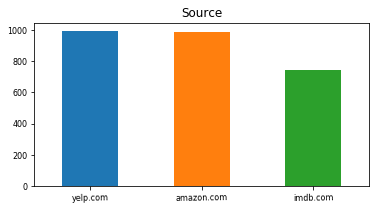

In [218]:
print(total1.Source.value_counts())

# plot barchart for total1_sample 
total1.Source.value_counts().plot(kind = 'bar',
                                    title = 'Source',
                                    ylim = 0,     
                                    rot = 1, fontsize = 8, figsize = (6,3))

yelp.com      996
amazon.com    990
imdb.com      745
Name: Source, dtype: int64


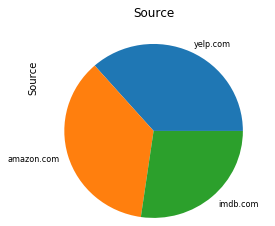

In [219]:
print(total1.Source.value_counts())

# plot barchart for total1_sample 
total1.Source.value_counts().plot(kind = 'pie',
                                    title = 'Source',
                                    ylim = 0,
                                    rot = 1, fontsize = 8, figsize = (4,2))
plt.show()